**ANS-1**
<br>
**using steepest descent**
1. The minima for f1(x) with A1 and x0=(2,0) is =[0.00195312 , 0.0 ] and Number of iteration taken= 10
2. The minima for f1(x) with A1 and x0=(2,2) is =[0.00195312 , 0.0 ] and Number of iteration taken= 10
3. The minima for f1(x) with A2 and x0=(2,0) is =[0.00095599 ,0.00087733] and Number of iteration taken= 44
4. The minima for f1(x) with A2 and x0=(2,2) is =[0.00097068 0.00097068] and Number of iteration taken= 48
<br>
As the function $$f1(x)= x_{1}^2+x_{2}^2$$
has minima (0,0) so (2,0) and (2,2)being near to it takes same number of iteration to reach minima.
<br>
whereas in function $$f2(x)= 10x_{1}^2+16x_{1}x_{2}+10x_{2}^2$$
To reach the minima from initail guess (2,0) takes less number of iteration than from (2,2) as it is farther from the minima 
<br>
**using Newton's Method**
1. The minima for f1(x) with A1 and x0=(2,0) is =[0.0 , 0.0 ] and Number of iteration taken= 2
2. The minima for f1(x) with A1 and x0=(2,2) is =[0.0, 0.0 ] and Number of iteration taken= 2
3. The minima for f1(x) with A2 and x0=(2,0) is =[0.0,0.0] and Number of iteration taken= 2
4. The minima for f1(x) with A2 and x0=(2,2) is =[0.0, 7.88860905e-31] and Number of iteration taken= 2
<br>
As the Hessian Matrix of the objective function is a SPD matrix so Newtons Method only takes 2 iterations to reach the minima.



In [3]:
#using backtracking to find the step length 
import numpy as np
import matplotlib.pyplot as pt
A1=np.array(np.diag((1,1)))
A2=np.array([[10,8],[8,10]])
x01=np.array([[2],[ 0]]) # first guess
x02=np.array([[2],[ 2]])
rho=0.9
c=10**(-4)
alpha_0=0.5
def backtracking_line_search(x0,A,alpha_0,c,rho):
    f_x0=0.5*np.matmul(x0.T,np.matmul(A,x0)).item()
    df=np.matmul(A,x0)
    alpha = alpha_0
    x_k=x0-(alpha*df)
    fx_k=0.5*(np.matmul(x_k.T,np.matmul(A,x_k))).item()
    count=1
    #backtracking condition being applies 
    while (((fx_k-f_x0)+(alpha*c*(np.matmul(df.T,df))).item())>0):
        alpha *= rho
        x_k=x0-(alpha*df)
        fx_k=0.5*np.matmul(x_k.T,np.matmul(A,x_k)).item() 
        count+=1
    return alpha 
# stepsize=backtracking_line_search(x0,A1,alpha_0,c,rho)
# print(stepsize)


**Backtracking Algorithm**
<br>
Backtracking algorithm is used to determine the stepsize in the steepest descent method.
$$f(x_k+\alpha)-f(x_k)+\alpha c P_{k} \delta f(x_k)>0$$
<br>
after choosing step length the gradient direction for:
1. steepest Method $$P_{k}=-\delta f(x_k)$$
2. Newtons Method $$P_{k}=-(\delta^2 f(x_k))\delta f(x_k)$$

the minima obtained at [0.00195312 0.        ]
number of iteration required10
the minima obtained at [0.00195312 0.00195312]
number of iteration required10
the minima obtained at [0.00095599 0.00087733]
number of iteration required44
the minima obtained at [0.00097068 0.00097068]
number of iteration required48


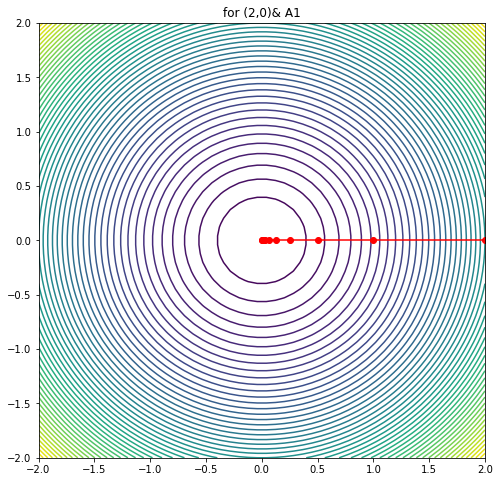

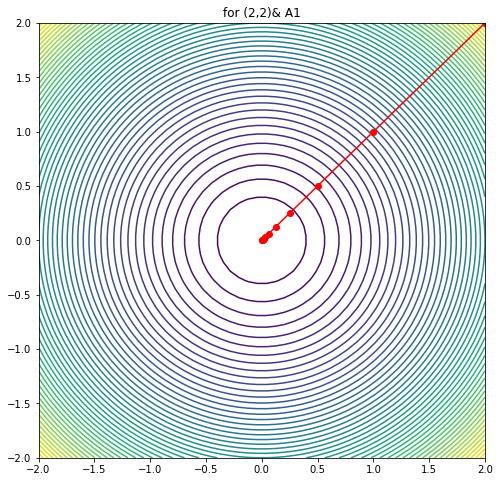

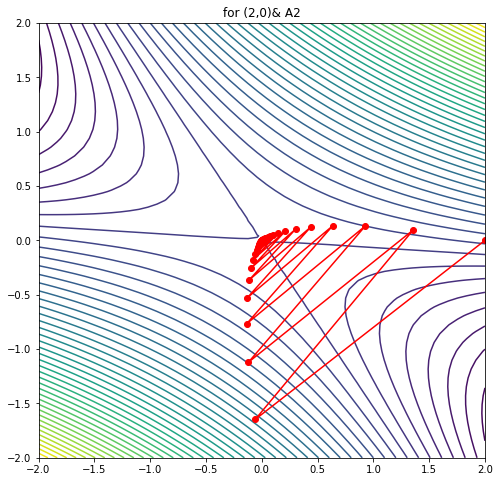

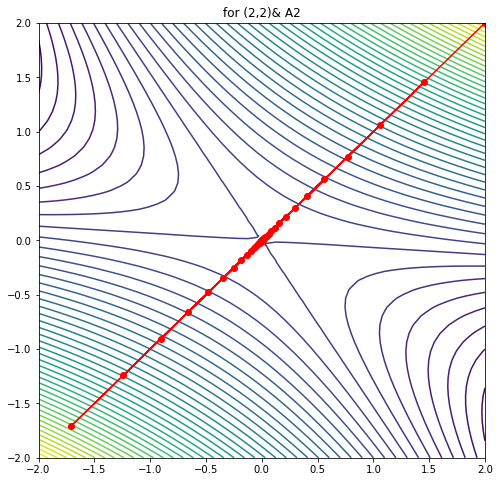

In [4]:
f1 = lambda x: (0.5*(x[0]**2 + x[1]**2))
f2=lambda x: (10*(x[0]**2+16*x[0]*x[1] +10* x[1]**2))
def steepest_descent(x0,A,alpha_0,c,rho,tol):
    fxs=[]
    xg=x0
    fxs.append(0.5*np.matmul(xg.T,np.matmul(A,xg)).item())
    grad=np.matmul(A,xg)
    xvals=[]
    xvals.append(list(xg.T)[0])
    cnt=0
    l=1
    for l in range (1,1000):
        alpha=backtracking_line_search(x0,A,alpha_0,c,rho)
        xk=xg
        xg=xk-alpha*grad
        grad=np.matmul(A,xg)
        fxs.append(0.5*np.matmul(xg.T,np.matmul(A,xg)).item())
        error =np.array((xg-xk),dtype=np.float64)
        norm=np.sum(np.power((error),2))
        xvals.append(list(xg.T)[0])
        cnt+=1
        if (norm<tol):
            break;
#     l+=1
    return fxs,xvals,cnt
tol=10**(-5)
fv,guesses,itr=steepest_descent(x01,A1,alpha_0,c,rho,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f1(np.array([xmesh, ymesh]))
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("for (2,0)& A1")
print("the minima obtained at {}".format(guesses[-1]))
print("number of iteration required{}".format(itr))

fv,guesses,itr=steepest_descent(x02,A1,alpha_0,c,rho,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f1(np.array([xmesh, ymesh]))
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("for (2,2)& A1")
print("the minima obtained at {}".format(guesses[-1]))
print("number of iteration required{}".format(itr))

fv,guesses,itr=steepest_descent(x01,A2,alpha_0,c,rho,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f2(np.array([xmesh, ymesh]))
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("for (2,0)& A2")
print("the minima obtained at {}".format(guesses[-1]))
print("number of iteration required{}".format(itr))
fv,guesses,itr=steepest_descent(x02,A2,alpha_0,c,rho,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f2(np.array([xmesh, ymesh]))
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("for (2,2)& A2")
print("the minima obtained at {}".format(guesses[-1]))
print("number of iteration required{}".format(itr))

the minima obtained at= [0. 0.]
number of iteration required= 2
the minima obtained at= [0. 0.]
number of iteration required= 2
the minima obtained at= [0. 0.]
number of iteration required= 2
the minima obtained at= [0.00000000e+00 7.88860905e-31]
number of iteration required= 2


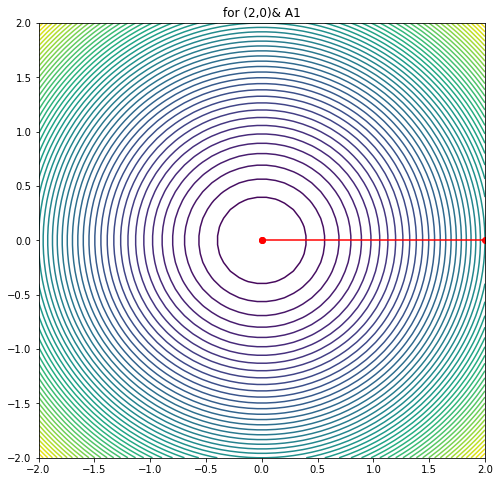

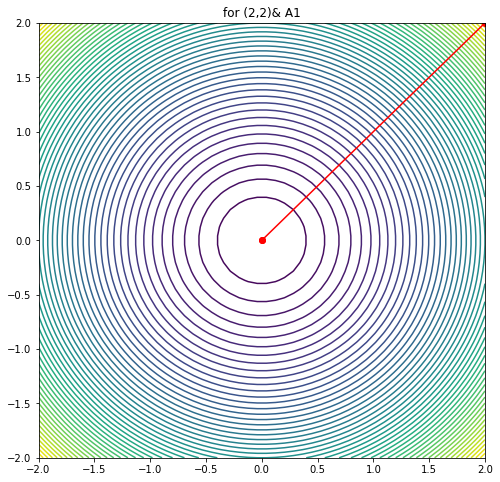

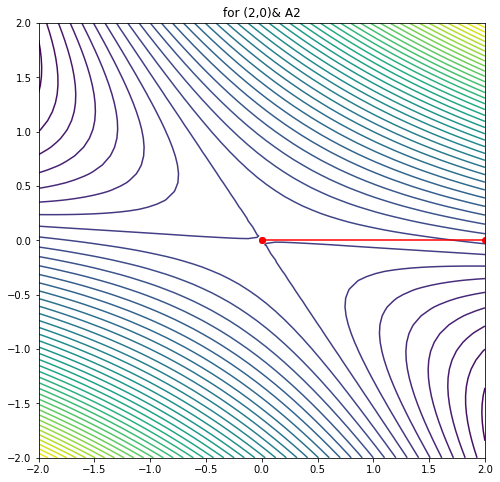

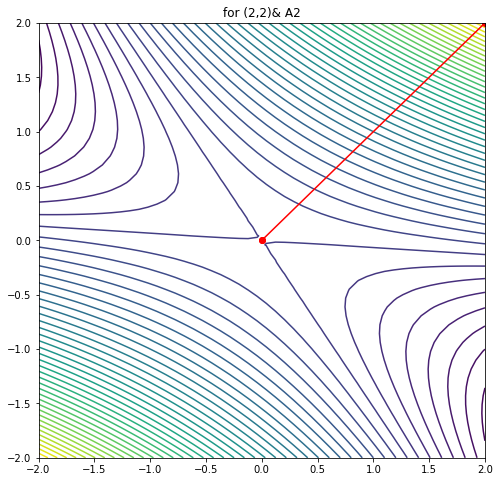

In [6]:
#applying Newtons Method to find minima 
def Newton(x0,A,tol):
    fxs=[]
    xg=x0
    fxs.append(0.5*np.matmul(xg.T,np.matmul(A,xg)).item())
    grad=np.matmul(A,xg)
    dd=A
    if np.all(np.linalg.eigvals(dd) > 0):
        xvals=[]
        xvals.append(list(xg.T)[0])
        cnt=0
        l=1
        for l in range (1,1000):
            xk=xg
            P_Nk=np.matmul(np.linalg.inv(dd),grad)
            xg=xk-P_Nk
            grad=np.matmul(A,xg)
            fxs.append(0.5*np.matmul(xg.T,np.matmul(A,xg)).item())
            error =np.array((xg-xk),dtype=np.float64)
            norm=np.sum(np.power((error),2))
            xvals.append(list(xg.T)[0])
            cnt+=1
            if (norm<tol):
                break;
        l+=1
        return fxs,xvals,cnt
    else:
        print("Newton's Method is not possible")
tol=10**(-5)
fv,guesses,itr=Newton(x01,A1,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f1(np.array([xmesh, ymesh]))
# pt.axis("equal")
fig=pt.figure(figsize=(8,8))
# ax = pt.axes(projection ='3d')
# ax.plot_surface(xmesh, ymesh, fmesh, 50)
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("for (2,0)& A1")
print("the minima obtained at= {}".format(guesses[-1]))
print("number of iteration required= {}".format(itr))

fv,guesses,itr=Newton(x02,A1,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f1(np.array([xmesh, ymesh]))
# pt.axis("equal")
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("for (2,2)& A1")
print("the minima obtained at= {}".format(guesses[-1]))
print("number of iteration required= {}".format(itr))

fv,guesses,itr=Newton(x01,A2,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f2(np.array([xmesh, ymesh]))
# pt.axis("equal")
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("for (2,0)& A2")
print("the minima obtained at= {}".format(guesses[-1]))
print("number of iteration required= {}".format(itr))
fv,guesses,itr=Newton(x02,A2,tol)
xmesh, ymesh = np.mgrid[-2:2:50j,-2:2:50j]
fmesh = f2(np.array([xmesh, ymesh]))
# pt.axis("equal")
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[-1], "ro-")
pt.title("for (2,2)& A2")
print("the minima obtained at= {}".format(guesses[-1]))
print("number of iteration required= {}".format(itr))

# **ANS2**
# **formulating error function in quadratic form**
<br>
## Error Function:
$$error=Y-PX$$
$$MSE=\sum(Y-PX)^T(Y-PX)$$
$$=\frac{1}{2}(Jz-Y)^T(Jz-Y)$$
$$=(Jz-Y)^T(Jz-Y)$$
$$=\frac{1}{2}z^TJ^TJz-Y^TJz+\frac{1}{2}Y^TY$$
comparing with quadratic loss formulation gnerel form $$\frac{1}{2}z^TAz+b^Tz+c$$
we get 
$$A=J^TJ$$
$$b^T=-Y^TJ$$
$$c=\frac{1}{2}Y^TY$$
where 
$$z=[p,q]^T_{2*1}$$
$$J=[x,1]_{m*2}$$
$$Y=[Y]_{m*1}$$
##$$IN x_{i},y_{i} form :$$
$$f(x,y)=\frac{1}{2}(\sum (px(i)+q-y(i))^2)$$
$$f(x,y)=\frac{1}{2}(px(i)+q)^2-(px(i)y(i)+qy(i))+\frac{1}{2}y(i)^2 (in Quadratic form)$$

converged
252.31788339341978 [0.33187562 1.00433246] 42
the optimal value obtained is (0.33187561786955144,1.004332462690029)
converged
23.13850857346779 [1.11956745 2.6273938 ] 20
the optimal value obtained is (1.1195674530356672,2.6273937967954764)


Text(0.5, 1.0, 'for hyperparameter=0.1')

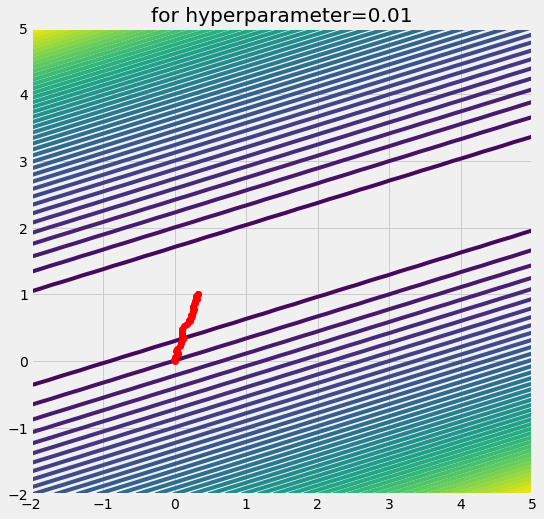

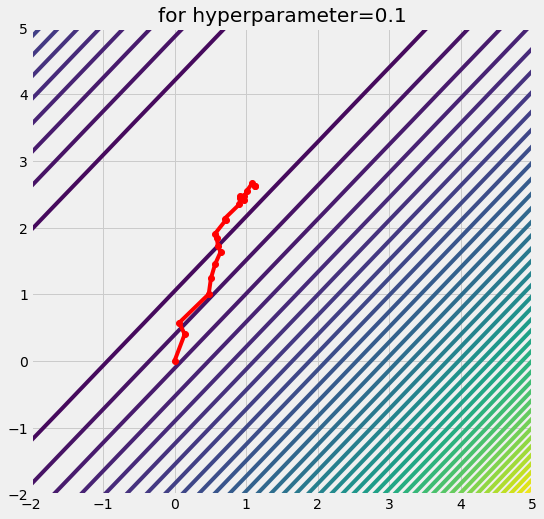

In [83]:
import numpy as np
import matplotlib.pyplot as pt
from random import seed
from random import randint
seed(1)
d=np.load('PS2_q2_data.npy')
X=np.array([d[:,0]]).T
Y=np.array([d[:,1]]).T
J=np.concatenate((X,np.ones((len(X),1))),axis=1)
A=np.matmul(J.T,J)
bt=-np.matmul(Y.T,J)
# print(np.shape(bt))
c=0.5*np.matmul(Y.T,Y)
# def grads(x,i):
#     Ad=np.matmul(J[i].T,J[i])
#     btd=-np.matmul(Y[i].T,J)
#     grad=grad=(np.matmul(xg.T,Ad)+btd)
#     return grad
f = lambda x: (0.5*np.matmul(x.T,np.matmul(A,x))+np.matmul(bt,x)+c).item()
def SGD(xg,A,bt,c,hyper,tol,X,Y):
    fxs=[]
    fxs.append(((0.5*np.matmul(xg.T,np.matmul(A,xg))+np.matmul(bt,xg)+c)).item())
    grad=(np.matmul(xg.T,A)+bt)
    xvals=[]
    xvals.append(list(xg.T)[0])
    cnt=0
    l=0
    for i in range(1,1000):
        xk=xg
        i=randint(0,len(X)-1)
        Ad=np.matmul(np.array([J[i]]).T,np.array([J[i]]))
        btd=-np.matmul(np.array([Y[i]]).T,np.array([J[i]]))
        df=(np.matmul(xg.T,Ad)+btd)
#         print(np.shape(xk))
        n=hyper*df
        xg=xk-n.T
#         print(np.shape(grad))
        fxs.append(((0.5*np.matmul(xg.T,np.matmul(A,xg))+np.matmul(bt,xg)+c)).item())
        error =np.array((xg-xk),dtype=np.float64)
        norm=np.sum(np.power((error),2))
        xvals.append(list(xg.T)[0])
        cnt+=1
        if (norm<tol):
            print("converged")
            break;
        if (norm!=norm):
            print("Diverged")
            return 0
    l+=1
    return fxs,xvals,cnt
tol=10**(-5)
hyper1=0.01
hyper2=0.1
x0=np.array([[0],[0]])
fv,guesses,itr=SGD(x0,A,bt,c,hyper1,tol,X,Y)
p,q=guesses[-1]
print(fv[-1],guesses[-1],itr)
# fn1= lambda x: (0.5*(p*x[0]+q)**2-(p*x[0]*x[1]+q*x[1])+0.5*x[1]**2)
fn= lambda x: (p*x[0]+q-x[1])**2
xmesh, ymesh = np.mgrid[-2:5:50j,-2:5:50j]
fmesh = fn(np.array([xmesh, ymesh]))
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
print("the optimal value obtained is ({},{})".format(p,q))
pt.title("for hyperparameter=0.01")
fv,guesses,itr=SGD(x0,A,bt,c,hyper2,tol,X,Y)
p,q=guesses[-1]
print(fv[-1],guesses[-1],itr)
fmesh = fn(np.array([xmesh, ymesh]))
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 50)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
print("the optimal value obtained is ({},{})".format(p,q))
pt.title("for hyperparameter=0.1")

**ANS**
1. for hyper parameter= 0.01 ,The solution doesnot converges to optimal value after taking 42 iterations 
2. or hyper parameter= 0.1 ,The solution doesnot converges to optimal value but reaches near to the optimal value after taking 20 iterations as the value of hyperparameter is large as the hyperparameter value increases it reduces the no of iteration to reach solution.

1.5484893270612474 [2.03308447 3.01351556] 75
2.0330844662817498
3.0135155643992717


Text(0.5, 1.0, 'using steepest Gradient Descent Method')

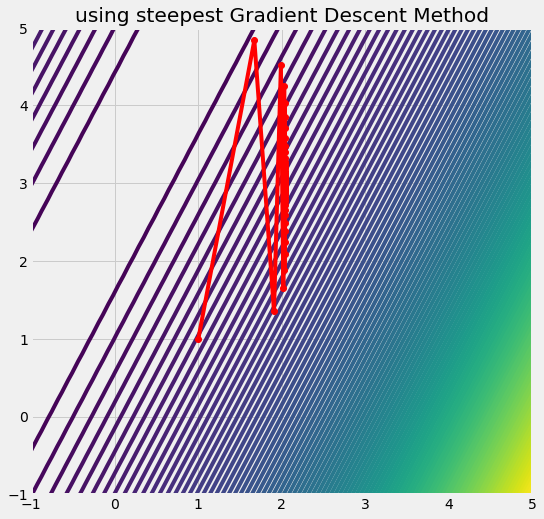

In [71]:
import numpy as np
import matplotlib.pyplot as pt
d=np.load('PS2_q2_data.npy')
X=np.array([d[:,0]]).T
Y=np.array([d[:,1]]).T
J=np.concatenate((X,np.ones((len(X),1))),axis=1)
A=np.matmul(J.T,J)
bt=-np.matmul(Y.T,J)
# print(np.shape(bt))
c=0.5*np.matmul(Y.T,Y)
# print(np.shape(c))
x0=np.array([[1],[1]])
alpha_0=0.5
c1=10**(-4)
rho=0.9
f = lambda x: (0.5*np.matmul(x.T,np.matmul(A,x))+np.matmul(bt,x)+c).item()
def backtracking_line_search(x0,A,bt,c,alpha_0,c1,rho):
    f_x0=f(x0)
    df=(np.matmul(x0.T,A)+bt)
#     print((df))
    alpha = alpha_0
#     print((alpha))
    n=df*alpha
#     print(n)
    x_k=x0-n.T
#     print(x_k)
#     x_k=x0-(alpha*df)
#     print(np.shape(x_k))
    fx_k=f(x_k)
#     print(fx_k)
    count=1
    while ((((fx_k-f_x0)+(alpha*c1*(np.matmul(df,df.T)))).item())>0):
        alpha *= rho
        n=df*alpha
#         print(n)
        x_k=x0-n.T
        fx_k=f(x_k) 
        count+=1
    return alpha

def steepest_descent(x0,A,bt,c,alpha_0,c1,rho,tol):
    fxs=[]
    xg=x0
#     print(np.shape(xg))
    fxs.append(((0.5*np.matmul(xg.T,np.matmul(A,xg))+np.matmul(bt,xg)+c)).item())
    grad=(np.matmul(xg.T,A)+bt)
#     print(np.shape(grad))
    xvals=[]
    xvals.append(list(xg.T)[0])
    cnt=0
    l=0
    for i in range(1,1000):
        alpha=backtracking_line_search(x0,A,bt,c,alpha_0,c1,rho)
        xk=xg
#         print(np.shape(xk))
        n=grad*alpha
        xg=xk-n.T
#         print(np.shape(xg))
        grad=(np.matmul(xg.T,A)+bt)
#         print(np.shape(grad))
        fxs.append(((0.5*np.matmul(xg.T,np.matmul(A,xg))+np.matmul(bt,xg)+c)).item())
        error =np.array((xg-xk),dtype=np.float64)
        norm=np.sum(np.power((error),2))
        xvals.append(list(xg.T)[0])
        cnt+=1
        if (norm<tol):
            break;
    l+=1
    return fxs,xvals,cnt
tol=10**(-5)
fv,guesses,itr=steepest_descent(x0,A,bt,c,alpha_0,c1,rho,tol)
print(fv[-1],guesses[-1],itr)
p,q=guesses[-1]
print(p)
print(q)
# fn1= lambda x: (0.5*(p*x[0]+q)**2-(p*x[0]*x[1]+q*x[1])+0.5*x[1]**2)
fn= lambda x: (p*x[0]+q-x[1])**2
xmesh, ymesh = np.mgrid[-1:5:50j,-1:5:50j]
fmesh = fn(np.array([xmesh, ymesh]))
fig=pt.figure(figsize=(8,8))
pt.contour(xmesh, ymesh, fmesh, 100)
it_array = np.array(guesses)
pt.plot(it_array.T[0], it_array.T[1], "ro-")
pt.title("using steepest Gradient Descent Method")

**ANS**
The number of iteration taken by steepest descent method to reach optimal solution is more and the computational time taken in comparision to the SGD method is more as it has to calculate gradient of whole data whereas in SGD method we calculate gradientfor only one data set and use hyper parameter instead of step leangth.

print the optimal value after regression ([2.02761582],[3.00828054])


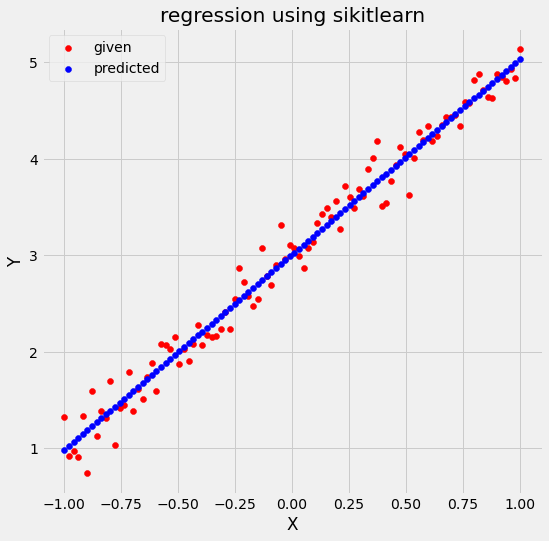

In [84]:
import numpy as np
from sklearn.linear_model import SGDRegressor
d=np.load('PS2_q2_data.npy')
X=np.array([d[:,0]]).T
Y=np.array([d[:,1]]).T
sgd_reg=SGDRegressor(loss='squared_loss',max_iter=1000,tol=1e-3,penalty=None,eta0=0.1)
sgd_reg.fit(X,Y.ravel())
print("print the optimal value after regression ({},{})".format(sgd_reg.coef_,sgd_reg.intercept_))
Y_pred=sgd_reg.predict(X)
pt.style.use('fivethirtyeight')
fig=pt.figure(figsize=(8,8))
pt.scatter(X,Y,color='r',label='given')
pt.scatter(X,Y_pred,color='b',label='predicted')
pt.xlabel('X')
pt.ylabel('Y')
pt.title("regression using sikitlearn")
pt.legend()
# J=np.concatenate((np.ones((len(X),1)),X),axis=1)
# C=np.matmul(np.linalg.pinv(J),Y)
# print(C)